In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC

#### make data

In [2]:
# Generate moon dataset
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

In [3]:
# Define your own SVC class
class MySVC:
    def __init__(self, kernel='rbf', C=1.0, gamma='scale'):
        self.kernel = kernel
        self.C = C
        self.gamma = gamma
        self.model = None

    def fit(self, X, y):
        self.model = SVC(kernel=self.kernel, C=self.C, gamma=self.gamma)
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

    def plot_support_vectors(self, X, y):
        sv_indices = self.model.support_
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
        plt.scatter(X[sv_indices, 0], X[sv_indices, 1], facecolors='none', edgecolors='k', s=100)
        plt.xlim(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5)
        plt.ylim(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.title('Support Vectors')

In [4]:
# Create an instance of your SVC class with different configurations
svc_rbf = MySVC(kernel='rbf', C=1.0, gamma='scale')
svc_linear = MySVC(kernel='linear', C=1.0)
svc_poly = MySVC(kernel='poly', C=1.0, gamma=3.0)
svc_precomputed = MySVC(kernel='precomputed')

# Fit the models on the moon dataset
svc_rbf.fit(X, y)
svc_linear.fit(X, y)
svc_poly.fit(X, y)


In [5]:
# Create a mesh grid for visualization
h = 0.02
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Get predictions for each model on the mesh grid
Z_rbf = svc_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_linear = svc_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z_poly = svc_poly.predict(np.c_[xx.ravel(), yy.ravel()])


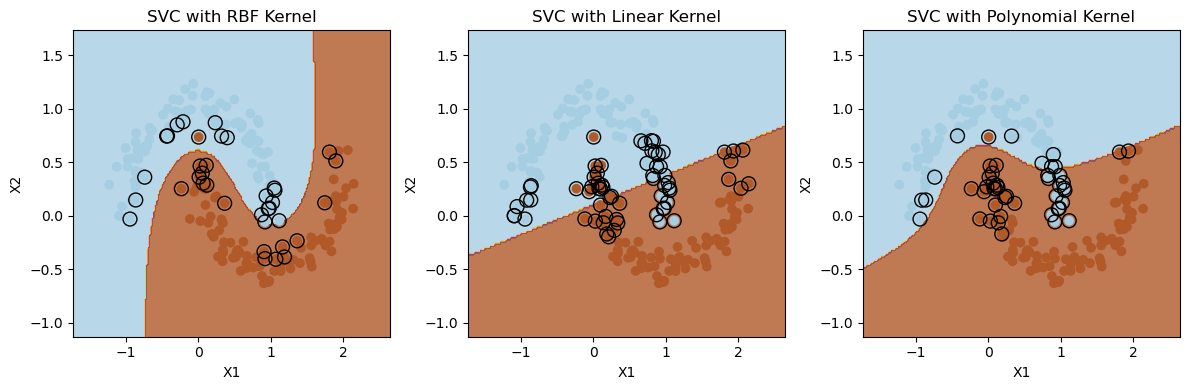

In [6]:
# Reshape the predictions for visualization
Z_rbf = Z_rbf.reshape(xx.shape)
Z_linear = Z_linear.reshape(xx.shape)
Z_poly = Z_poly.reshape(xx.shape)

# Plot the moon dataset and decision boundaries with support vectors
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.contourf(xx, yy, Z_rbf, cmap=plt.cm.Paired, alpha=0.8)
svc_rbf.plot_support_vectors(X, y)
plt.title('SVC with RBF Kernel')

plt.subplot(132)
plt.contourf(xx, yy, Z_linear, cmap=plt.cm.Paired, alpha=0.8)
svc_linear.plot_support_vectors(X, y)
plt.title('SVC with Linear Kernel')

plt.subplot(133)
plt.contourf(xx, yy, Z_poly, cmap=plt.cm.Paired, alpha=0.8)
svc_poly.plot_support_vectors(X, y)
plt.title('SVC with Polynomial Kernel')

plt.tight_layout()
plt.show()